# Exploratory Data Analysis(EDA) on Haberman's Survival Dataset make you Diagnose Cancer

# Introduction

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. 

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)
I would like to explain the various data analysis operation, I have done on this data set and how to conclude or predict survival status of patients who undergone from surgery.

First of all for any data analysis task or for performing operation on data we should have good domain knowledge so that we can relate the data features and also can give accurate conclusion. So, I would like to explain the features of data set and how it affects other feature.

EDA(exploratory data analysis): EDA is the task of analysis data using different plotting tools like linear algebra, statistics and other technique

# Objective:

Given new dataset i.e haberman's-survival dataset and we have to predict survival status of patients who undergone from surgery.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
haberman=pd.read_csv('C:\\Users\\anu14\\Downloads\\haberman.csv',names=['age','operation_yr','lymph_Node','survival_status'])
haberman

,age,operation_yr,lymph_Node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Domain Knowledge:

1.Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

2.Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)

3.Operation year: Year in which patient was undergone surgery(1958–1969)

4.Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

So, lets get started to play with the data set and get the conclusion.


In [3]:
print(haberman.shape)

(306, 4)


In [4]:
print(haberman.columns)

Index(['age', 'operation_yr', 'lymph_Node', 'survival_status'], dtype='object')


In [5]:
haberman['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

# Obervations

1.The given datset, we know that this is imbalanced dataset.

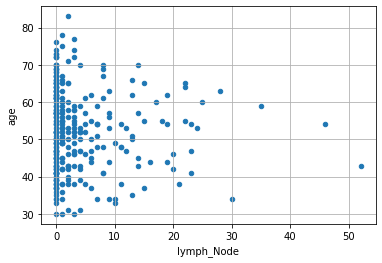

In [6]:
# 2-D Scatterplot 
haberman.plot(kind='scatter',x='lymph_Node',y='age')
plt.grid()
plt.show()

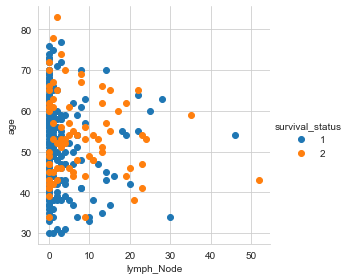

In [7]:
# 2-D scatterplot with color coding for each class
sns.set_style('whitegrid');
sns.FacetGrid(haberman,hue='survival_status',height=4).map(plt.scatter,'lymph_Node','age').add_legend();
plt.show()

# Observations:

1.Using age and lymph_node features we can not distiguish the survival status.

2.Distiguishing Survival status of more than 5 yr and less than 5 yr is much harder as they have considerable overlap

We draw multiple 2-D scatter plots for each combination of features.
Number of combination exist = 3c2=3

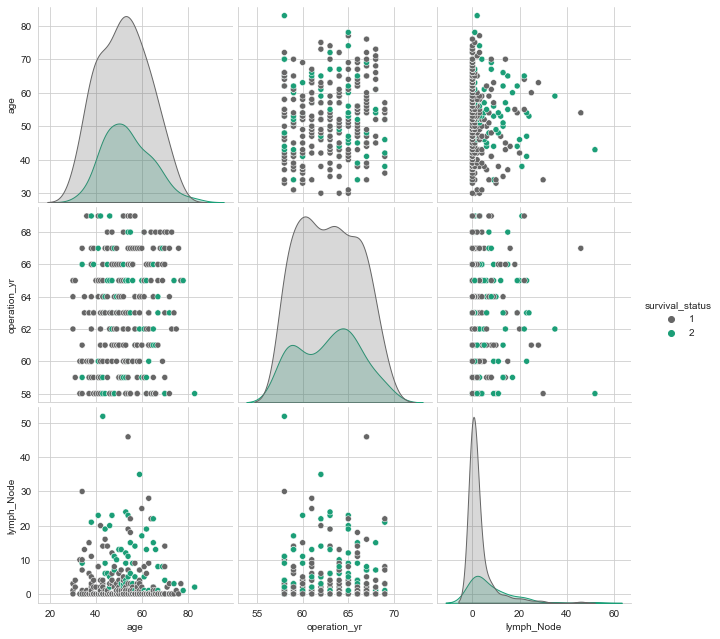

In [8]:
# pairplot
plt.close()
sns.set_style('whitegrid');
sns.pairplot(haberman, hue='survival_status', height=3, vars=['age', 'operation_yr', 'lymph_Node'],palette='Dark2_r');
plt.show()

Note: Diagonal elements are PDF for each features.

We will visualize 2-D data in different,2-D plots to understand what the data is and such a plot is called pair plot.

# Observations:

Above image is the combinations plot of all features in data. Plot 1,Plot 5 and Plot 9 are the histograms of all combinations of features which explain you the density of data by considering different features of data.

Now, let's take plots 1 by 1 and I will explain to you that which data feature I will take for my further data analysis. I will take such data which can show me distinguishable differences from any other data feature. So, let's start analyzing each plot except plot 1,5,9 as it is a histogram of features in pair plots.

plot 2: In plot 2 there are the combinations of age and operation_yr features and from the above analysis, we can't distinguish the above data properly so we will discard this for further analysis.

plot 3: In plot 3 there are the combinations of age and lymph_Node features and from the above analysis, we can see that not perfectly but almost all data are separable by using this property and, from above all the diagram this is a bit nice to analysis for further. So we will select this for future analysis.

Plot 4: It is plotted using the data feature Operation Age and Age which shows similar type of plot like Plot 2 but it just rotated by 90 degree. So I also reject this feature.

Plot 6:It plot on the feature Operation Age and Axillary nodes which is somewhat similar to the Plot 2 but overlapping of points seems to be more in this plot comparative to other. So, I will also reject this combination.

Plot 7: This plot is similar as Plot 3 only feature interchange its axis so the plot will rotate by 90 degree. Also, I will accept this combination for further operations.

Plot 8: It is same as Plot 6 only feature on axis interchange.

So From the above diagram we will select plots 3 and 7 which have features interchangeable age and lymph_Node.

In [9]:
print(haberman.columns)

Index(['age', 'operation_yr', 'lymph_Node', 'survival_status'], dtype='object')


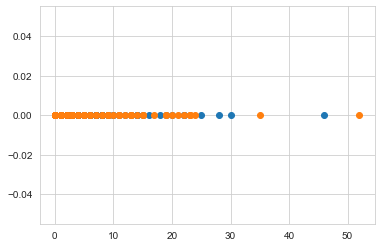

In [10]:
# 1-D scatterplot(Histogram,PDF,CDF)
long_survive= haberman.loc[haberman['survival_status']==1]
short_survive= haberman.loc[haberman['survival_status']==2]
plt.plot(long_survive['lymph_Node'],np.zeros_like(long_survive['lymph_Node']),'o')
plt.plot(short_survive['lymph_Node'],np.zeros_like(short_survive['lymph_Node']),'o')
plt.show();

# Observations:

From given above plot It's very hard to make sense as points are overlapping a lot.There is better way to visualizing 1-D scatter plots by Using Histogram ,PDF,CDF.

Histogram: The tower-like structure where the y-axis basically gives us counts and the x-axis gives us variable or features is called Histogram.

PDF (Probability Density Function): It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram.

CDF (Cumulative Distribution Function): It is representation of cumulative data of PDF ie. it will plot a graph by considering PDF for every data point cumulatively.

Seaborn library will help you to plot PDF and CDF of any data so that you can easily visualise the density of data present on specific point.Below code snippet will plot the PDF

C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


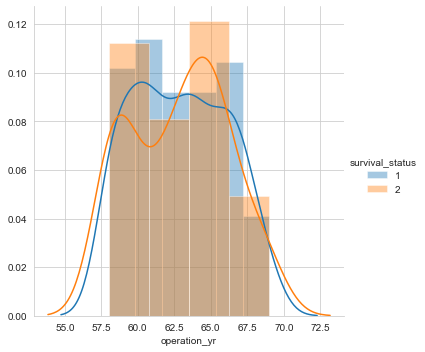

In [11]:
sns.FacetGrid(haberman,hue='survival_status', height=5).map(sns.distplot,'operation_yr').add_legend();
plt.show()

# Observations:

Similar here we cannot predict anything with these histograms as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.

C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


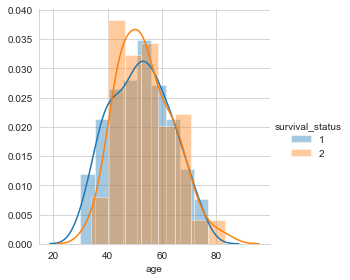

In [12]:
sns.FacetGrid(haberman,hue='survival_status', height=4).map(sns.distplot,'age').add_legend();
plt.show()

# Observations:

In above plot it is observed that at the age range from 30–75 the status of survival and death is same. So, using this datapoint we cannot predict anything.

C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anu14\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


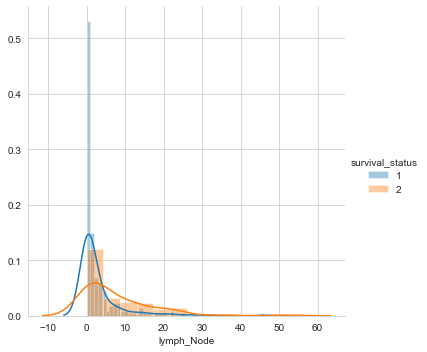

In [13]:
sns.FacetGrid(haberman,hue='survival_status', height=5).map(sns.distplot,'lymph_Node').add_legend();
plt.show()

# Observations

It has been observed that people survive long if they have less lymph_Nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all. So, I accept the PDF of Axillary nodes and can conclude below result.

So from above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive. To know that we have another distribution that is CDF.
CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status

### Let's Plot CDF of our selected feature lymph_Node for long_survival

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


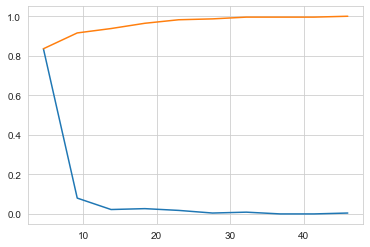

In [14]:
counts, bin_edges = np.histogram(long_survive['lymph_Node'],bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
# Compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Observations:


above CDF plot we can observe that 85% people survie equal to or more than 5yr if lymph_Nodes<5 and as lymph node increases survival rate will decrease. According to the above graph if lymph_nodes >40 less than 5 yr survival of peope will be 100%. So as lymph nodes increases survival of poeple will deacreses and vice versa. 

# Let's Plot CDF of our selected feature lymph_Node for short_survival

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


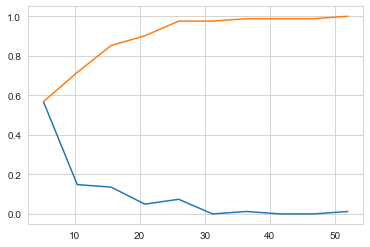

In [15]:
counts, bin_edges = np.histogram(short_survive['lymph_Node'],bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
# Compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Observations:

above CDF plot we can observe that 55% people survie equal to or more than 5yr if lymph_Nodes<5 and as lymph node increases survival rate will decrease. According to the above graph if lymph_nodes >40 less than 5 yr survival of peope will be 100%. So as lymph nodes increases survival of poeple will deacreses and vice versa.

# Let's see some mathematical Observations using mathematical formulae:

The mean is the sum of the numbers in a data set divided by the total number of values in the data set.Mean is best used for a data set with numbers that are close together.
Standard deviation is a number that describes how spread out the values are. A low standard deviation means that most of the numbers are close to the mean (average) value. A high standard deviation means that the values are spread out over a wider range.

For long survival mean and standard deviation using numpy:

### Mean, Standard Deviation

In [16]:
print("Mean: ")
print(np.mean(long_survive['lymph_Node']))
# mean using outlier
print(np.mean(np.append(long_survive['lymph_Node'],100)))
print("Standard-Deviation: ")
print(np.std(long_survive['lymph_Node']))

Mean: 
2.7911111111111113
3.2212389380530975
Standard-Deviation: 
5.857258449412131


For short survival mean and standard deviation using numpy:

In [17]:
print("Mean: ")
print(np.mean(short_survive['lymph_Node']))
# mean using outlier
print(np.mean(np.append(short_survive['lymph_Node'],100)))
print("Standard-Deviation: ")
print(np.std(short_survive['lymph_Node']))

Mean: 
7.45679012345679
8.585365853658537
Standard-Deviation: 
9.128776076761632


# Observations:


from above observation mean of long_survial is 2.79 and short_survival is 7.45 which is more than long survival, this means probability of short_survival is more.

Due to this outlier mean will crrupted alot.One error or outlier mean can jump drastically.

you can see standard deviation of long survival is 5.8 and short survival is 9.1 which is more than long survival.This means the spread of data of short survival is more and far.

### Median,Percentile,Quantile,IQR,Median Absolute Deviation(MAD)

Median is similar to mean(central tendency but it solve almost the error of outlier).

Percentile: It is basically says they do lie in the sorted list,the value that is 25th position is 25th percentile,the value that is 50th position is 50th percentileand the value that is 10th position is 10th percentile and so on.

Quantiles are points in a distribution that relate to the rank order of values in that distribution.It is basically breaking into 4 equal part like 0th,25th,50th,75thwhich is called 0th quatile,1st quatile,2nd quatile and 3rd quatile.

Median Absolute Deviation(MAD)is a robust measure of the variability of a univariate sample of quantitative data.

In [18]:
print("Median: ")
print(np.median(long_survive["lymph_Node"]))
# median using outlier
print(np.median(np.append(long_survive["lymph_Node"],100)))
print(np.median(short_survive["lymph_Node"]))

print("\nQuantile: ")
print(np.percentile(long_survive["lymph_Node"],np.arange(0,100,25)))
print(np.percentile(short_survive["lymph_Node"],np.arange(0,100,25)))

print("\n90th Percentile: ")
print(np.percentile(long_survive["lymph_Node"],90))
print(np.percentile(short_survive["lymph_Node"],90))

from statsmodels import robust
print("\nMedian Absolute Deviation: ")
print(robust.mad(long_survive["lymph_Node"]))
print(robust.mad(short_survive["lymph_Node"]))

Median: 
0.0
0.0
4.0

Quantile: 
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile: 
8.0
20.0

Median Absolute Deviation: 
0.0
5.930408874022408


From the above we found Median, Quantile, percentile and MAD

# Observations:

1. from the above observations we can see that there is no difference in median with outlier and without outlier. And we can see that median of long survival is 0 and short survival is 4 that mean people who have average 4 lymph node will survive less than 5 yr.

2. Quantiles shows that nearly 50th% of axillary nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.

3. Similarly, In short survival 75th% of patients have minimum 11 nodes detected.

4. At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status.

# Box Plot With Whiskers

This is another method of analyzing 1D scatter plot.A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.

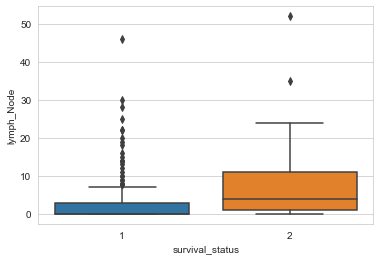

In [19]:
sns.boxplot(x="survival_status",y="lymph_Node",data=haberman)
plt.show()

# Observations:

In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2
So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status.
There are most of point above 12 lies in Short survival.

## Violin Plots

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

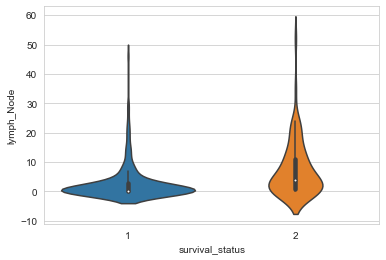

In [20]:
sns.violinplot(x="survival_status",y="lymph_Node",data=haberman,size=8)
plt.show()

It is same as Box whiskers plot only difference is instead of box histogram will represents spread of data.

# Observations:

In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range 0 to 7 and in violin 2 it shows the short survival density more from 0 to 20 ans threshold from 0 to 12.

## Contour Probability Density Plot 

A contour plot allows you to visualize 3-dimensional data in a 2-dimensional plot.The data for a contour plot is similar to a 3D plot. You can use a function of two variables, a data matrix, or the output of the CreateMesh function.

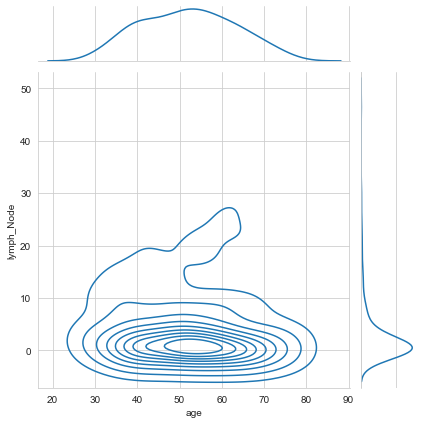

In [22]:
sns.jointplot(x="age",y="lymph_Node",data=long_survive,kind="kde")
plt.grid()
plt.show()

# Observations:

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47 to 60 and axillary nodes from 0 to 3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

# Conclusion:

Yes, you can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries.